choose a starting point: 1. Manama 2. Seef 3. Juffair 4. Riffa 5. Hamad 6. Zinj 7. Budaiya 8. saar 
1
choose a search algorithm: 1. A* 2. DFS
1
Starting at Manama with a heuristic of 0 and connected to 3 edges
current pointer Riffa
Moving to Riffa with a heuristic of 0 with a traffic of 25 so a total of min 25
[(<__main__.Graph object at 0x7df8d426c940>, 'Manama', 0), (<__main__.Graph object at 0x7df8d426c880>, 'Riffa', 25)]
2
Backtracking to Manama
[(<__main__.Graph object at 0x7df8d426c940>, 'Manama', 0)]
Time taken: 0.003804922103881836
2


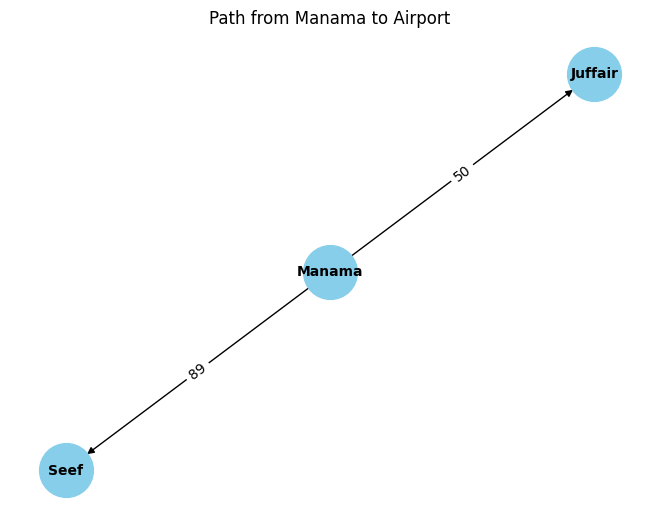

current pointer Juffair
Moving to Juffair with a heuristic of 0 with a traffic of 50 so a total of min 50
[(<__main__.Graph object at 0x7df8d426c940>, 'Manama', 0), (<__main__.Graph object at 0x7df8d426ed40>, 'Juffair', 50)]
current pointer Saar
Moving to Saar with a heuristic of 0 with a traffic of 2 so a total of min 2
[(<__main__.Graph object at 0x7df8d426c940>, 'Manama', 0), (<__main__.Graph object at 0x7df8d426ed40>, 'Juffair', 50), (<__main__.Graph object at 0x7df8d426e8f0>, 'Saar', 2)]
3
Backtracking to Juffair
[(<__main__.Graph object at 0x7df8d426c940>, 'Manama', 0), (<__main__.Graph object at 0x7df8d426ed40>, 'Juffair', 50)]
Time taken: 0.24083733558654785
5


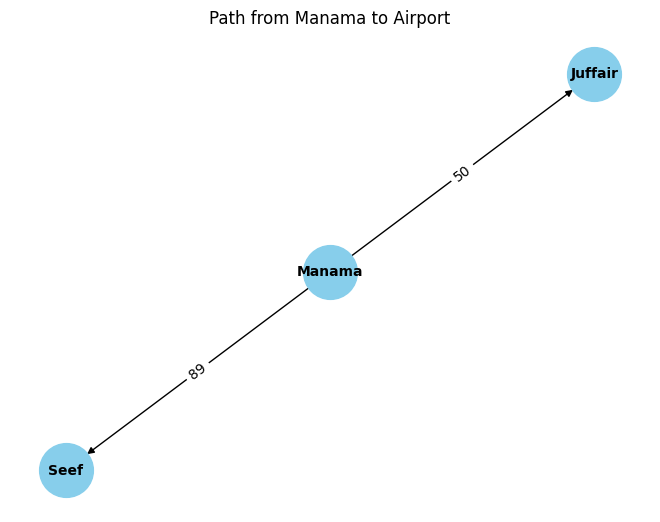

current pointer Zinj
Moving to Zinj with a heuristic of 0 with a traffic of 10 so a total of min 10
[(<__main__.Graph object at 0x7df8d426c940>, 'Manama', 0), (<__main__.Graph object at 0x7df8d426ed40>, 'Juffair', 50), (<__main__.Graph object at 0x7df8d426e8c0>, 'Zinj', 10)]
current pointer Airport
Moving to Airport with a heuristic of 0 with a traffic of 30 so a total of min 30
[(<__main__.Graph object at 0x7df8d426c940>, 'Manama', 0), (<__main__.Graph object at 0x7df8d426ed40>, 'Juffair', 50), (<__main__.Graph object at 0x7df8d426e8c0>, 'Zinj', 10), (<__main__.Graph object at 0x7df8d426ec50>, 'Airport', 30)]
Time taken: 0.49182891845703125
7


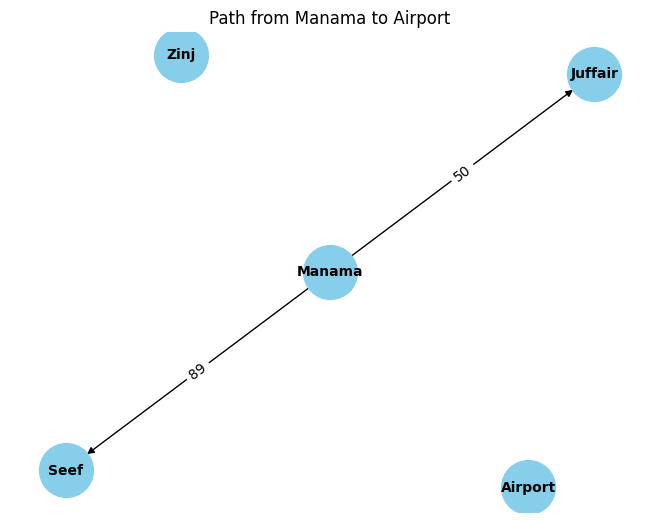

In [12]:
# Goal of this is to recreate how google maps can find the shortest route when there is traffic


# Create a graph of nodes and edges

# format of the node : (nodeName, heuristic, [(node, traffic), (node, traffic), ...])
import time
import networkx as nx
import matplotlib.pyplot as plt

class Graph():
    def __init__(self, name, heuristic =0 ): #heuristic is the estimated cost to reach the goal
        self.name = name
        self.heuristic = heuristic
        self.edges = []         #list of tuples (node, traffic)

    def addEdge(self, node,traffic = 0):
        self.edges.append((node, traffic)) #add a tuple of node and traffic to the list of edges

    def printConnection(self): #print the connections of the node
        current = self.name
        print(f"{current} : {self.heuristic} heuristic is connected to: ")
        for i in self.edges:
            print(f"{i[0].name} with {i[0].heuristic} heuristic and a traffic {i[1]}")

    def printCurrentPath(self, currentPath):
        for i in currentPath:
            print(f"{i[1]} ->")

    def visualize(self, currentPath):
        G = nx.DiGraph()
        for item in currentPath:
            node = item[0]
            node_name = item[1]
            if len(item) == 3:
                if isinstance(item[2], int):
                    distance = item[2]
                else:
                    distance = None
            else:
                distance = None
            G.add_node(node_name, heuristic=node.heuristic if hasattr(node, 'heuristic') else None)
        for node, traffic in self.edges:
            G.add_edge(self.name, node.name, traffic=traffic)

        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_size=1500, node_color="skyblue", font_size=10, font_weight="bold")
        edge_labels = nx.get_edge_attributes(G, 'traffic')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
        plt.title(f"Path from {self.name} to Airport")
        plt.show()

    def DeapthFirstSearch(self,goal): #test to see if i can go through the nodes
        #measure the time it takes to go through the nodes
        timeStart = time.time()
        pointer = self #the thought process is to use something similiar to  a linked list
        edges = self.edges
        print(f"Starting at {pointer.name} with a heuristic of {pointer.heuristic} and connected to {len(edges)} edges")
        currentPath = [(self,self.name,0)] #list of nodes that have been visited as a tuple (node, traffic)
        previous = None #to keep track of the previous node
        count = 0 #to keep track of the number of steps
        while pointer.name != goal: #keeps going until the goal is reached or we break the loop


            while len(edges) > 0: #loop to go through one branch of the graph
                previous = pointer
                pointer = edges[0][0] #move to the next node
                count += 1
                distance = edges[0][1] #get the traffic of the edge. not really needed for dfs but for testing purposes
                edges = pointer.edges #get the edges of the new node
                print(f"Moving to {pointer.name} with a heuristic of {pointer.heuristic} with a traffic of {distance}")
                currentPath.append((pointer.name, distance))

            if pointer.name != goal:
                while len(edges) == 0:
                    print(len(currentPath))
                    if len(currentPath)>=2:
                        print(f"Backtracking to {currentPath[-2][1]}")
                        pointer = currentPath[-2][0]
                        count += 1
                        currentPath.pop()
                        pointer.edges.pop(0)
                        edges = pointer.edges
                        print(f"{currentPath}")
                    else:
                        print("No path found")
                        return 0
                        break


        print(f"{currentPath} with a total of {count} steps")
        timeEnd = time.time()
        print(f"Time taken: {timeEnd - timeStart}")
        self.visualize(currentPath)


    def AstarSearch(self,goal):
        timeStart = time.time()
        pointer = self
        edges = self.edges
        currentPath = [(self,self.name,0)]
        count = 0

        print(f"Starting at {pointer.name} with a heuristic of {pointer.heuristic} and connected to {len(edges)} edges")

        while pointer.name != goal:

            while len(edges) > 0:

                min = 100000000000000

                currentIndex = 0
                count += 1


                for i in range(len(edges)):
                    if edges[i][0].heuristic + edges[i][1] < min:
                        min = edges[i][0].heuristic + edges[i][1]
                        currentIndex = i


                pointer = edges[currentIndex][0]
                print(f"current pointer {pointer.name}")
                distance = edges[currentIndex][1]

                currentPath.append((pointer,pointer.name,distance))

                print(f"Moving to {pointer.name} with a heuristic of {pointer.heuristic} with a traffic of {distance} so a total of min {min}")
                print(f"{currentPath}")

                edges = pointer.edges

            if pointer.name != goal:
                while len(edges) == 0:
                    print(len(currentPath))
                    if len(currentPath)>=2:
                        print(f"Backtracking to {currentPath[-2][1]}")
                        pointer = currentPath[-2][0]
                        count += 1
                        currentPath.pop()
                        pointer.edges.pop(currentIndex)
                        edges = pointer.edges
                        print(f"{currentPath}")
                    else:
                        print("No path found")
                        return 0
                        break
            timeEnd = time.time()
            print(f"Time taken: {timeEnd - timeStart}")
            print(count)
            self.visualize(currentPath)











#create the nodes
#format of the node : (nodeName, heuristic, [(node, traffic), (node, traffic), ...])
#heuristic is the estimated cost to reach the goal
#traffic is the time it takes to reach the node
#the nodes are connected to each other with the traffic time
#the goal is to reach the last node with the shortest time
#the heuristic is the estimated time to reach the goal



# heruistic generrator







#######


#create the nodes
manama = Graph("Manama", 0)
seef = Graph("Seef", 0)
juffair = Graph("Juffair", 0)
riffa = Graph("Riffa", 0)
hamad = Graph("Hamad", 0)
airport = Graph("Airport", 0) #goal
zinj = Graph("Zinj", 0)
budaiya = Graph("Budaiya", 0)
saar = Graph("Saar",0)

#connect the nodes
manama.addEdge(seef, 89)
manama.addEdge(juffair, 50)
manama.addEdge(riffa, 25)
seef.addEdge(juffair, 10)
seef.addEdge(budaiya, 100)
seef.addEdge(zinj, 78)
juffair.addEdge(saar, 2)
juffair.addEdge(zinj, 10)

zinj.addEdge(airport, 30)

budaiya.addEdge(airport, 2)



print("choose a starting point: 1. Manama 2. Seef 3. Juffair 4. Riffa 5. Hamad 6. Zinj 7. Budaiya 8. saar ")
start = input()
print("choose a search algorithm: 1. A* 2. DFS")
search = input()
#the destination will always be the airport
if start == "1":
    if search == "1":
        manama.AstarSearch("Airport")
    else:
        manama.AstarSearch("Airport")
elif start == "2":
    if search == "1":
        seef.AstarSearch("Airport")
    else:
        seef.DeapthFirstSearch("Airport")
elif start == "3":
    if search == "1":
        juffair.AstarSearch("Airport")
    else:
        juffair.DeapthFirstSearch("Airport")
elif start == "4":
    if search == "1":
        riffa.AstarSearch("Airport")
    else:
        riffa.DeapthFirstSearch("Airport")
elif start == "5":
    if search == "1":
        hamad.AstarSearch("Airport")
    else:
        hamad.DeapthFirstSearch("Airport")
elif start == "6":
    if search == "1":
        zinj.AstarSearch("Airport")
    else:
        zinj.DeapthFirstSearch("Airport")

elif start == "8":
    if search == "1":
        saar.AstarSearch("Airport")
    else:
        saar.DeapthFirstSearch("Airport")
elif start == "7":
    if search == "1":
        budaiya.AstarSearch("Airport")
    else:
        budaiya.DeapthFirstSearch("Airport")
else:
    print("Invalid input")